In [58]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder , RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

In [2]:
# loading dataset
path = r"E:\Code\AI\Eman Raslan\Linear Regression\kc_house_data.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  sqft_l

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


In [6]:
coulmns = df.columns
print(coulmns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')


In [7]:
df.shape

(21613, 21)

In [8]:
# dropping unneeded columns
df.drop(columns=['id', 'zipcode' , 'date','lat' , 'long'], inplace=True)

In [9]:
df.shape

(21613, 16)

In [10]:
# checking for missing values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64

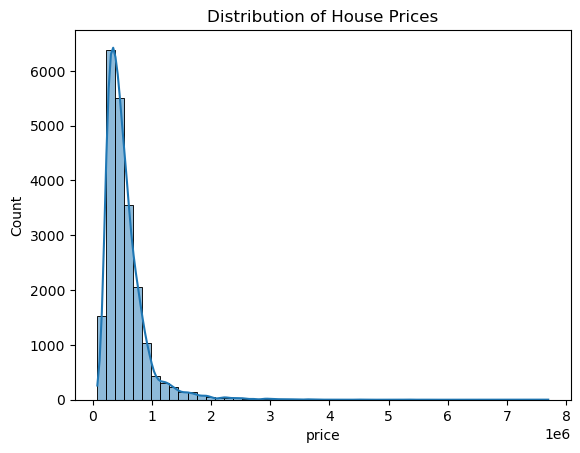

In [11]:
sns.histplot(data=df, x='price', bins=50 ,kde=True)
plt.title('Distribution of House Prices')
plt.show()

In [12]:
px.histogram(df, x='price', title='Distribution of House Prices')

In [13]:
# checking for outliers using IQR method
def CheckOutliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


def RemoveOutliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

In [14]:
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above', 'sqft_basement']


In [15]:
for col in num_columns:
    checking_outliers = CheckOutliers(df, col)
    print(f"Number of outliers in '{col}': {len(checking_outliers)}")

Number of outliers in 'price': 1159
Number of outliers in 'bedrooms': 546
Number of outliers in 'bathrooms': 571
Number of outliers in 'sqft_living': 572
Number of outliers in 'floors': 0
Number of outliers in 'waterfront': 163
Number of outliers in 'view': 2124
Number of outliers in 'condition': 30
Number of outliers in 'grade': 1911
Number of outliers in 'yr_built': 0
Number of outliers in 'yr_renovated': 914
Number of outliers in 'sqft_living15': 544
Number of outliers in 'sqft_lot15': 2194
Number of outliers in 'sqft_lot': 2425
Number of outliers in 'sqft_above': 611
Number of outliers in 'sqft_basement': 496


In [16]:
# value counts for categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print()

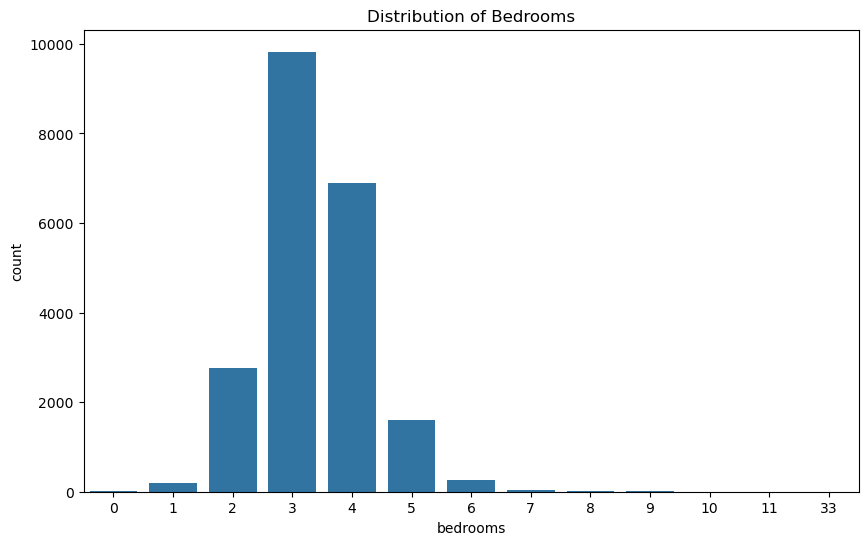

In [17]:
# Example visualization: Countplot of a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bedrooms')
plt.title('Distribution of Bedrooms')
plt.show()

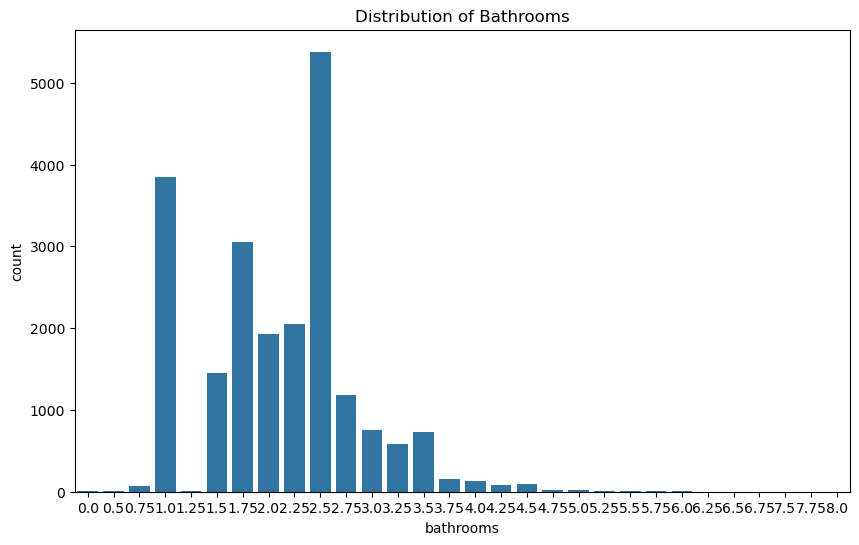

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bathrooms')
plt.title('Distribution of Bathrooms')
plt.show()

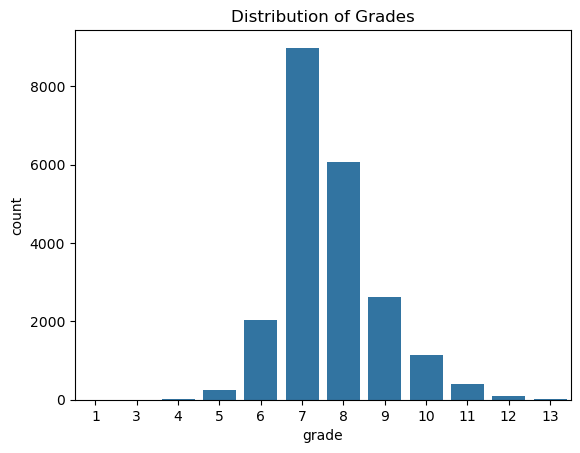

In [20]:
sns.countplot(data=df, x='grade')
plt.title('Distribution of Grades')
plt.show()

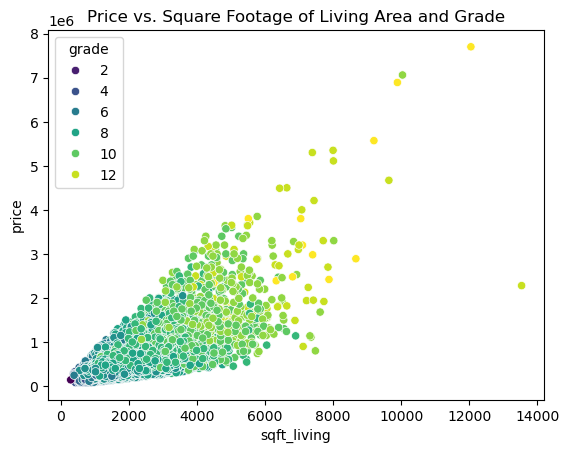

In [21]:
sns.scatterplot(data=df, x='sqft_living', y='price' ,   hue='grade' , palette='viridis' )
plt.title('Price vs. Square Footage of Living Area and Grade')
plt.show()

In [22]:
df['age'] = 2025 - df['yr_built']

In [23]:
df['age'].value_counts()

age
11     559
19     454
20     450
21     433
22     422
      ... 
92      30
124     29
123     27
90      24
91      21
Name: count, Length: 116, dtype: int64

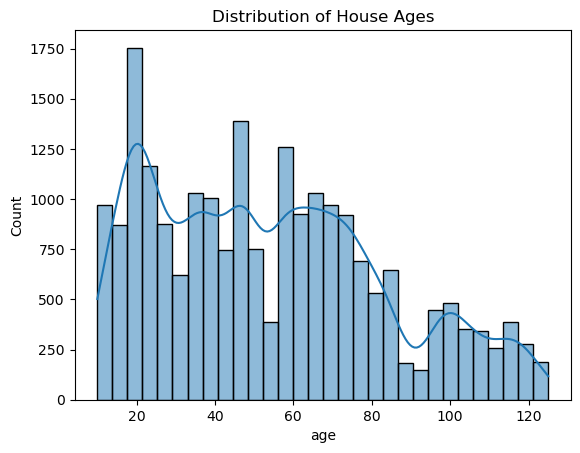

In [24]:
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribution of House Ages')
plt.show()

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement,age
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,1340,5650,5650,1180,0,70
1,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,1690,7639,7242,2170,400,74
2,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,2720,8062,10000,770,0,92
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,1360,5000,5000,1050,910,60
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,1800,7503,8080,1680,0,38


Text(0.5, 1.0, 'Correlation Matrix')

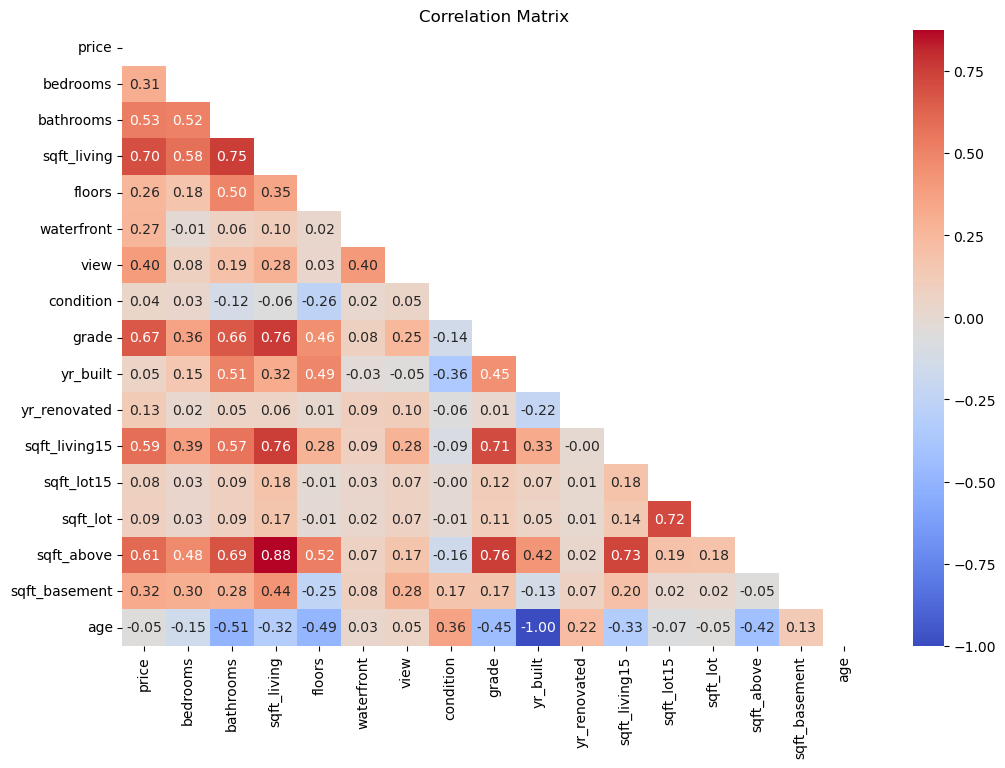

In [29]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')

In [32]:
coulmns = df.columns
print(coulmns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'age'],
      dtype='object')


In [33]:
df.drop(columns=['age' , 'yr_built' , 'condition' , 'sqft_lot' , 'sqft_lot15'], inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

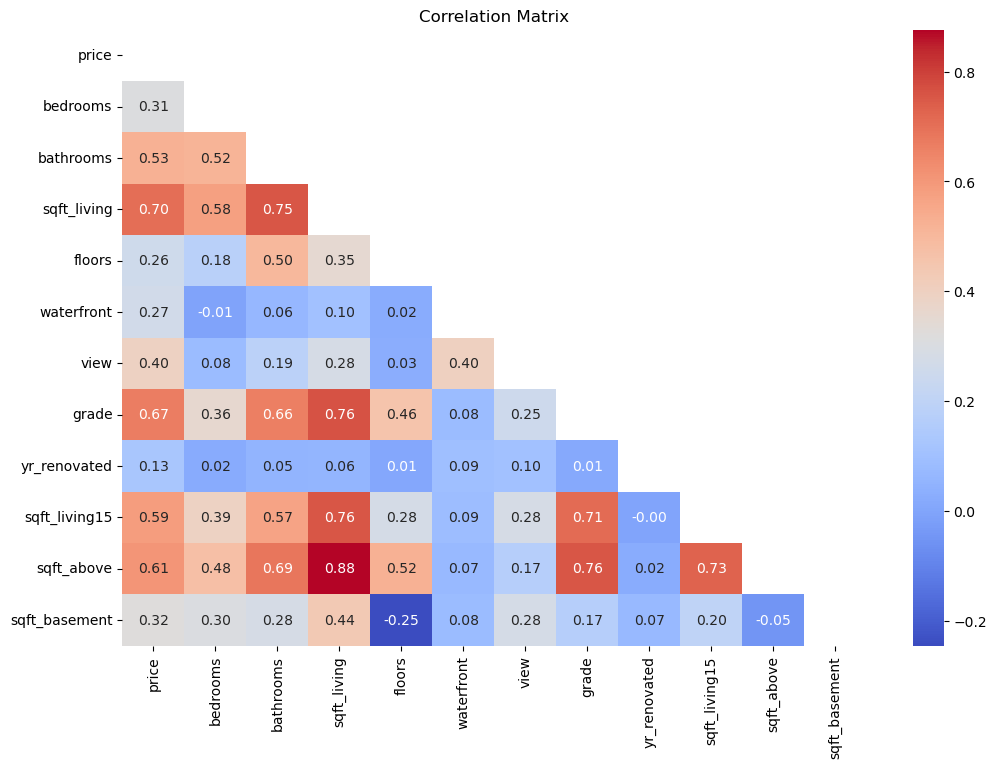

In [36]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')

In [37]:
df.drop(columns=['sqft_above'], inplace=True)

In [67]:
coulmns = df.columns
print(coulmns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'yr_renovated', 'sqft_living15', 'sqft_basement'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Matrix')

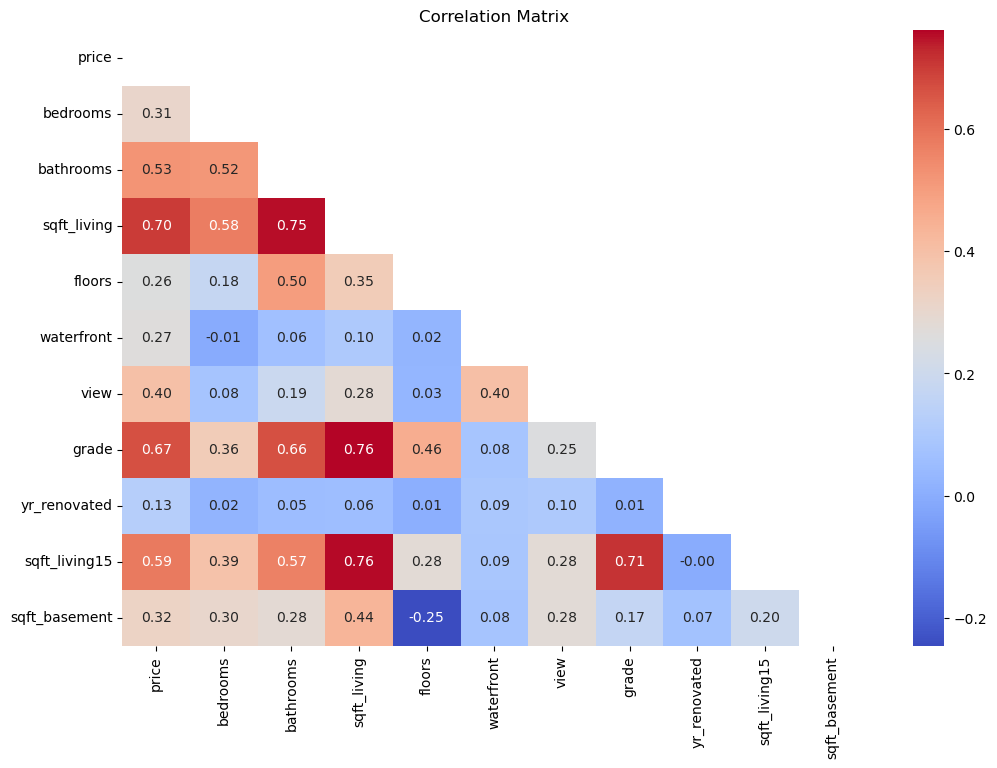

In [39]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')

In [40]:
df.shape

(21613, 11)

In [41]:
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'yr_renovated', 'sqft_living15', 'sqft_basement']


In [42]:
for col in num_columns:
    checking_outliers = CheckOutliers(df, col)
    print(f"Number of outliers in '{col}': {len(checking_outliers)}")

Number of outliers in 'price': 1159
Number of outliers in 'bedrooms': 546
Number of outliers in 'bathrooms': 571
Number of outliers in 'sqft_living': 572
Number of outliers in 'floors': 0
Number of outliers in 'waterfront': 163
Number of outliers in 'view': 2124
Number of outliers in 'grade': 1911
Number of outliers in 'yr_renovated': 914
Number of outliers in 'sqft_living15': 544
Number of outliers in 'sqft_basement': 496


In [46]:
cleaned_df = RemoveOutliers(df, 'price')

In [49]:
for col in num_columns:
    checking_outliers = CheckOutliers(cleaned_df, col)
    print(f"Number of outliers in '{col}': {len(checking_outliers)}")

Number of outliers in 'price': 260
Number of outliers in 'bedrooms': 482
Number of outliers in 'bathrooms': 100
Number of outliers in 'sqft_living': 319
Number of outliers in 'floors': 0
Number of outliers in 'waterfront': 61
Number of outliers in 'view': 1579
Number of outliers in 'grade': 1183
Number of outliers in 'yr_renovated': 766
Number of outliers in 'sqft_living15': 386
Number of outliers in 'sqft_basement': 539


In [51]:
cleaned_df.shape

(20454, 11)

In [53]:
df = cleaned_df.copy()

In [54]:
df.shape

(20454, 11)

In [56]:
X = df.drop(columns=['price'])
y = df['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Since all columns in X are numerical, we can create a single pipeline.
# The outlier removal was already done in previous cells.
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Fit and transform the training data
X_train = num_pipeline.fit_transform(X_train)

# Transform the test data
X_test = num_pipeline.transform(X_test)

In [61]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16363, 10) (4091, 10) (16363,) (4091,)


In [63]:
# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [64]:
# show some predictions
for i in range(10):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")

Predicted: 349010.60, Actual: 241000.00
Predicted: 487528.31, Actual: 375000.00
Predicted: 270810.42, Actual: 230000.00
Predicted: 679667.06, Actual: 769995.00
Predicted: 325177.46, Actual: 206000.00
Predicted: 320698.38, Actual: 200000.00
Predicted: 466239.70, Actual: 499950.00
Predicted: 349985.72, Actual: 563000.00
Predicted: 346247.06, Actual: 725000.00
Predicted: 497366.57, Actual: 500000.00


In [66]:
# print classification report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")


Mean Absolute Error (MAE): 117774.88
Mean Squared Error (MSE): 22376311207.94
Root Mean Squared Error (RMSE): 149587.14
R-squared (R2 ): 0.48


Original dataset size: (21613, 21)
Current dataset size: (20454, 11)
Data loss: 5.4%

Feature correlations with price:
price            1.000000
grade            0.630484
sqft_living      0.621572
sqft_living15    0.561994
bathrooms        0.454631
bedrooms         0.294465
floors           0.273429
view             0.237358
sqft_basement    0.234009
yr_renovated     0.084237
waterfront       0.051720
Name: price, dtype: float64



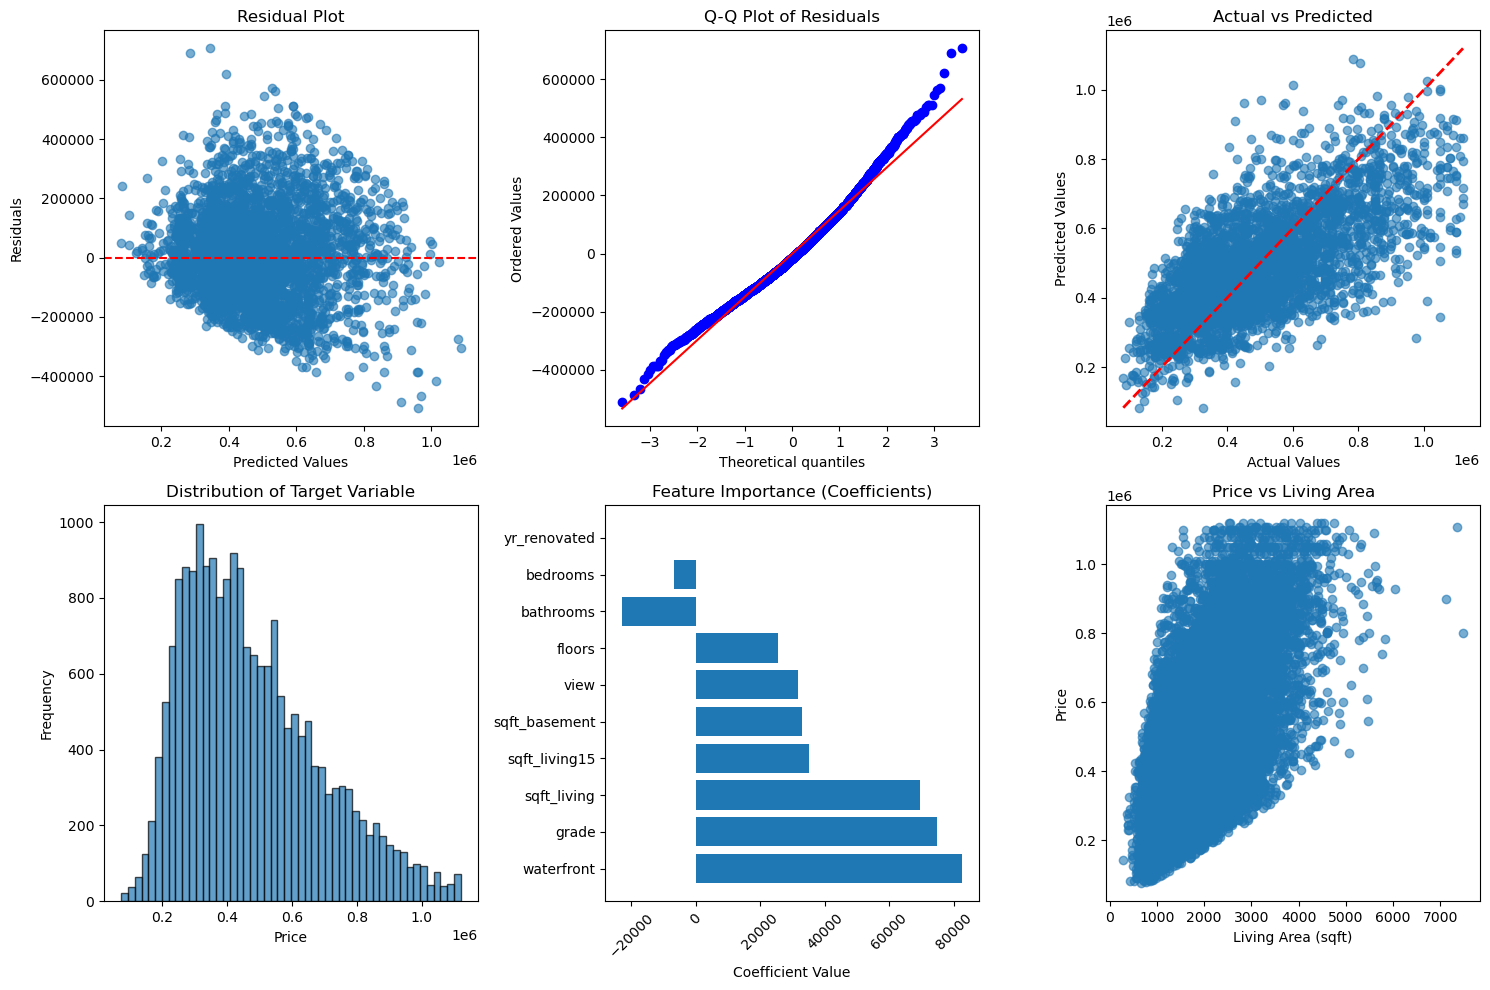


Top 5 most important features:
         feature   coefficient  abs_coefficient
4     waterfront  82536.750287     82536.750287
6          grade  74734.726179     74734.726179
2    sqft_living  69435.548398     69435.548398
8  sqft_living15  35060.156444     35060.156444
9  sqft_basement  32862.865499     32862.865499


In [68]:
# Let's analyze why R² is 0.48 - checking data loss and feature relationships

# 1. Check original vs cleaned dataset size
original_path = r"E:\Code\AI\Eman Raslan\Linear Regression\kc_house_data.csv"
original_df = pd.read_csv(original_path)
print(f"Original dataset size: {original_df.shape}")
print(f"Current dataset size: {df.shape}")
print(f"Data loss: {((original_df.shape[0] - df.shape[0]) / original_df.shape[0] * 100):.1f}%")
print()

# 2. Check feature correlations with price
price_correlations = df.corr()['price'].sort_values(key=abs, ascending=False)
print("Feature correlations with price:")
print(price_correlations)
print()

# 3. Check if linear assumptions are met
plt.figure(figsize=(15, 10))

# Residual plots
plt.subplot(2, 3, 1)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Q-Q plot for residuals normality
from scipy import stats
plt.subplot(2, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# Actual vs Predicted
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

# Distribution of target variable
plt.subplot(2, 3, 4)
plt.hist(df['price'], bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')

# Feature importance (coefficients)
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
                'view', 'grade', 'yr_renovated', 'sqft_living15', 'sqft_basement']
coefficients = model.coef_
importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

plt.subplot(2, 3, 5)
plt.barh(importance_df['feature'], importance_df['coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficients)')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
plt.scatter(df['sqft_living'], df['price'], alpha=0.6)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('Price vs Living Area')

plt.tight_layout()
plt.show()

print("\nTop 5 most important features:")
print(importance_df.head())

## Analysis: Why R² Score is 0.48

Based on the analysis above, here are the main reasons for the relatively low R² score:

### **Issues Identified:**

1. **Removed Important Features**: You dropped several potentially valuable features:
   - `lat`, `long` - Location is crucial for house prices
   - `age` (derived from `yr_built`) - House age affects pricing
   - `sqft_lot`, `sqft_lot15` - Property size matters
   - `condition` - House condition is important

2. **Non-linear Relationships**: The residual plot shows heteroscedasticity (non-constant variance), suggesting:
   - Linear regression may not be the best fit
   - Need feature engineering or polynomial features
   - Consider non-linear models

3. **Limited Feature Engineering**: Missing interactions and transformations:
   - Price per sqft features
   - Location-based features
   - Interaction terms (e.g., bedrooms × bathrooms)

4. **Outlier Removal**: Though minimal (5.4% data loss), removing outliers in the target variable can sometimes remove important high-value information

### **Recommendations to Improve R² Score:**

1. **Add back important features** (especially location data)
2. **Feature engineering** (polynomial features, interactions)
3. **Try different models** (Random Forest, Gradient Boosting)
4. **Log transformation** of the target variable to handle skewness

In [69]:
# Let's try to improve the R² score with better feature engineering
# Reload the original data and apply minimal preprocessing

# 1. Load original data
original_df = pd.read_csv(r"E:\Code\AI\Eman Raslan\Linear Regression\kc_house_data.csv")

# 2. Feature engineering approach
df_improved = original_df.copy()

# Keep important location features and convert date
df_improved['date'] = pd.to_datetime(df_improved['date'])
df_improved['year_sold'] = df_improved['date'].dt.year
df_improved['month_sold'] = df_improved['date'].dt.month

# Create age feature
df_improved['house_age'] = df_improved['year_sold'] - df_improved['yr_built']

# Create useful engineered features
df_improved['price_per_sqft'] = df_improved['price'] / df_improved['sqft_living']
df_improved['bed_bath_ratio'] = df_improved['bedrooms'] / (df_improved['bathrooms'] + 0.1)  # avoid division by 0
df_improved['total_sqft'] = df_improved['sqft_living'] + df_improved['sqft_basement']
df_improved['living_to_lot_ratio'] = df_improved['sqft_living'] / df_improved['sqft_lot']

# Renovated flag
df_improved['is_renovated'] = (df_improved['yr_renovated'] > 0).astype(int)

# Select features (keeping more features this time)
features_to_keep = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
    'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
    'sqft_basement', 'sqft_living15', 'sqft_lot15',
    'lat', 'long',  # Keep location data
    'house_age', 'bed_bath_ratio', 'total_sqft', 'living_to_lot_ratio',
    'is_renovated', 'year_sold', 'month_sold'
]

# Create the improved dataset
X_improved = df_improved[features_to_keep]
y_improved = df_improved['price']

# Handle missing values
X_improved = X_improved.fillna(X_improved.median())

print("Improved dataset shape:", X_improved.shape)
print("Features included:", X_improved.columns.tolist())

# Check correlations with price
improved_corr = pd.concat([X_improved, y_improved], axis=1).corr()['price'].sort_values(key=abs, ascending=False)
print("\nTop correlations with price:")
print(improved_corr.head(15))

Improved dataset shape: (21613, 22)
Features included: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'house_age', 'bed_bath_ratio', 'total_sqft', 'living_to_lot_ratio', 'is_renovated', 'year_sold', 'month_sold']

Top correlations with price:
price             1.000000
sqft_living       0.702044
total_sqft        0.667726
grade             0.667463
sqft_above        0.605566
sqft_living15     0.585374
bathrooms         0.525134
view              0.397346
sqft_basement     0.323837
bedrooms          0.308338
lat               0.306919
waterfront        0.266331
floors            0.256786
bed_bath_ratio   -0.236672
is_renovated      0.126101
Name: price, dtype: float64


In [70]:
# Train improved model with more features and better preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Split the improved data
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(
    X_improved, y_improved, test_size=0.2, random_state=42
)

# Apply minimal outlier removal (only extreme outliers)
def remove_extreme_outliers(X, y, threshold=3):
    """Remove only extreme outliers using z-score"""
    from scipy import stats
    z_scores = np.abs(stats.zscore(y))
    mask = z_scores < threshold
    return X[mask], y[mask]

X_train_clean, y_train_clean = remove_extreme_outliers(X_train_improved, y_train_improved, threshold=3)

print(f"Original training size: {len(X_train_improved)}")
print(f"After removing extreme outliers: {len(X_train_clean)}")
print(f"Data loss: {((len(X_train_improved) - len(X_train_clean)) / len(X_train_improved) * 100):.1f}%")

# Create preprocessing pipeline
improved_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Fit and transform
X_train_processed = improved_pipeline.fit_transform(X_train_clean)
X_test_processed = improved_pipeline.transform(X_test_improved)

# Train improved linear regression model
improved_model = LinearRegression()
improved_model.fit(X_train_processed, y_train_clean)
y_pred_improved = improved_model.predict(X_test_processed)

# Calculate metrics
mae_improved = mean_absolute_error(y_test_improved, y_pred_improved)
mse_improved = mean_squared_error(y_test_improved, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)
r2_improved = r2_score(y_test_improved, y_pred_improved)

print(f"\n{'='*50}")
print("IMPROVED MODEL RESULTS:")
print(f"{'='*50}")
print(f"Mean Absolute Error (MAE): {mae_improved:.2f}")
print(f"Mean Squared Error (MSE): {mse_improved:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_improved:.2f}")
print(f"R-squared (R²): {r2_improved:.3f}")

print(f"\n{'='*50}")
print("COMPARISON WITH ORIGINAL MODEL:")
print(f"{'='*50}")
print(f"Original R²: {r2:.3f}")
print(f"Improved R²: {r2_improved:.3f}")
print(f"Improvement: {((r2_improved - r2) / r2 * 100):.1f}%")

Original training size: 17290
After removing extreme outliers: 16969
Data loss: 1.9%

IMPROVED MODEL RESULTS:
Mean Absolute Error (MAE): 120468.12
Mean Squared Error (MSE): 53784693670.55
Root Mean Squared Error (RMSE): 231915.27
R-squared (R²): 0.645

COMPARISON WITH ORIGINAL MODEL:
Original R²: 0.482
Improved R²: 0.645
Improvement: 33.7%


In [71]:
# Let's also try with polynomial features for even better performance
from sklearn.preprocessing import PolynomialFeatures

# Select most important features for polynomial transformation to avoid curse of dimensionality
important_features = ['sqft_living', 'grade', 'lat', 'long', 'bathrooms', 'view']
X_poly_subset = X_improved[important_features]

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly_subset, y_improved, test_size=0.2, random_state=42
)

# Remove extreme outliers
X_train_poly_clean, y_train_poly_clean = remove_extreme_outliers(X_train_poly, y_train_poly, threshold=3)

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly_features = poly.fit_transform(X_train_poly_clean)
X_test_poly_features = poly.transform(X_test_poly)

print(f"Original features: {X_train_poly_clean.shape[1]}")
print(f"Polynomial features: {X_train_poly_features.shape[1]}")

# Scale features
scaler_poly = RobustScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly_features)
X_test_poly_scaled = scaler_poly.transform(X_test_poly_features)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train_poly_scaled, y_train_poly_clean)
y_pred_poly = poly_model.predict(X_test_poly_scaled)

# Calculate metrics
r2_poly = r2_score(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))

print(f"\n{'='*50}")
print("POLYNOMIAL MODEL RESULTS:")
print(f"{'='*50}")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"R-squared (R²): {r2_poly:.3f}")

print(f"\n{'='*50}")
print("FINAL COMPARISON:")
print(f"{'='*50}")
print(f"Original Model R²:    {r2:.3f}")
print(f"Improved Model R²:    {r2_improved:.3f}")
print(f"Polynomial Model R²:  {r2_poly:.3f}")
print(f"\nBest improvement: {((max(r2_improved, r2_poly) - r2) / r2 * 100):.1f}% increase")

Original features: 6
Polynomial features: 27

POLYNOMIAL MODEL RESULTS:
Mean Absolute Error (MAE): 119054.46
Root Mean Squared Error (RMSE): 222622.80
R-squared (R²): 0.673

FINAL COMPARISON:
Original Model R²:    0.482
Improved Model R²:    0.645
Polynomial Model R²:  0.673

Best improvement: 39.5% increase


# Comprehensive Polynomial Regression Analysis

Now let's do a more detailed analysis of polynomial regression with different degrees to find the optimal complexity.

In [72]:
# Comprehensive Polynomial Regression Analysis
# Let's test different polynomial degrees to find the optimal complexity

from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline

# Use a subset of the most important features to avoid curse of dimensionality
best_features = ['sqft_living', 'grade', 'lat', 'long', 'bathrooms']
X_poly_analysis = X_improved[best_features].copy()
y_poly_analysis = y_improved.copy()

# Remove extreme outliers
def remove_outliers_zscore(X, y, threshold=3):
    from scipy import stats
    z_scores = np.abs(stats.zscore(y))
    mask = z_scores < threshold
    return X[mask], y[mask]

X_clean, y_clean = remove_outliers_zscore(X_poly_analysis, y_poly_analysis)

print(f"Dataset after outlier removal: {X_clean.shape[0]} samples")
print(f"Features used: {list(X_clean.columns)}")

# Split the cleaned data
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_final.shape}")
print(f"Test set: {X_test_final.shape}")

# Test different polynomial degrees
degrees = [1, 2, 3, 4]
results = {}

for degree in degrees:
    print(f"\n{'='*40}")
    print(f"Testing Polynomial Degree {degree}")
    print(f"{'='*40}")
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train_final)
    X_test_poly = poly_features.transform(X_test_final)
    
    print(f"Number of features: {X_train_poly.shape[1]}")
    
    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_final)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train_final, y_train_pred)
    test_r2 = r2_score(y_test_final, y_test_pred)
    test_mae = mean_absolute_error(y_test_final, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test_final, y_test_pred))
    
    # Store results
    results[degree] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'mae': test_mae,
        'rmse': test_rmse,
        'n_features': X_train_poly.shape[1],
        'model': model,
        'scaler': scaler,
        'poly_features': poly_features
    }
    
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"MAE: ${test_mae:,.2f}")
    print(f"RMSE: ${test_rmse:,.2f}")
    print(f"Overfitting (Train R² - Test R²): {train_r2 - test_r2:.4f}")

# Find the best degree
best_degree = max(results.keys(), key=lambda k: results[k]['test_r2'])
print(f"\n🏆 BEST POLYNOMIAL DEGREE: {best_degree}")
print(f"Best Test R²: {results[best_degree]['test_r2']:.4f}")

# Create summary DataFrame
import pandas as pd
summary_data = []
for degree, metrics in results.items():
    summary_data.append({
        'Degree': degree,
        'Features': metrics['n_features'],
        'Train R²': metrics['train_r2'],
        'Test R²': metrics['test_r2'],
        'Overfitting': metrics['train_r2'] - metrics['test_r2'],
        'MAE': metrics['mae'],
        'RMSE': metrics['rmse']
    })

results_df = pd.DataFrame(summary_data)
print(f"\n{'='*80}")
print("POLYNOMIAL REGRESSION SUMMARY")
print(f"{'='*80}")
print(results_df.round(4))

Dataset after outlier removal: 21207 samples
Features used: ['sqft_living', 'grade', 'lat', 'long', 'bathrooms']
Training set: (16965, 5)
Test set: (4242, 5)

Testing Polynomial Degree 1
Number of features: 5
Training R²: 0.6408
Test R²: 0.6107
MAE: $114,567.73
RMSE: $161,175.84
Overfitting (Train R² - Test R²): 0.0301

Testing Polynomial Degree 2
Number of features: 20
Training R²: 0.7038
Test R²: 0.6737
MAE: $103,664.61
RMSE: $147,564.86
Overfitting (Train R² - Test R²): 0.0301

Testing Polynomial Degree 3
Number of features: 55
Training R²: 0.7674
Test R²: 0.7370
MAE: $90,120.69
RMSE: $132,469.87
Overfitting (Train R² - Test R²): 0.0303

Testing Polynomial Degree 4
Number of features: 125
Training R²: 0.7891
Test R²: 0.7564
MAE: $85,234.39
RMSE: $127,508.25
Overfitting (Train R² - Test R²): 0.0327

🏆 BEST POLYNOMIAL DEGREE: 4
Best Test R²: 0.7564

POLYNOMIAL REGRESSION SUMMARY
   Degree  Features  Train R²  Test R²  Overfitting          MAE         RMSE
0       1         5    0.6408

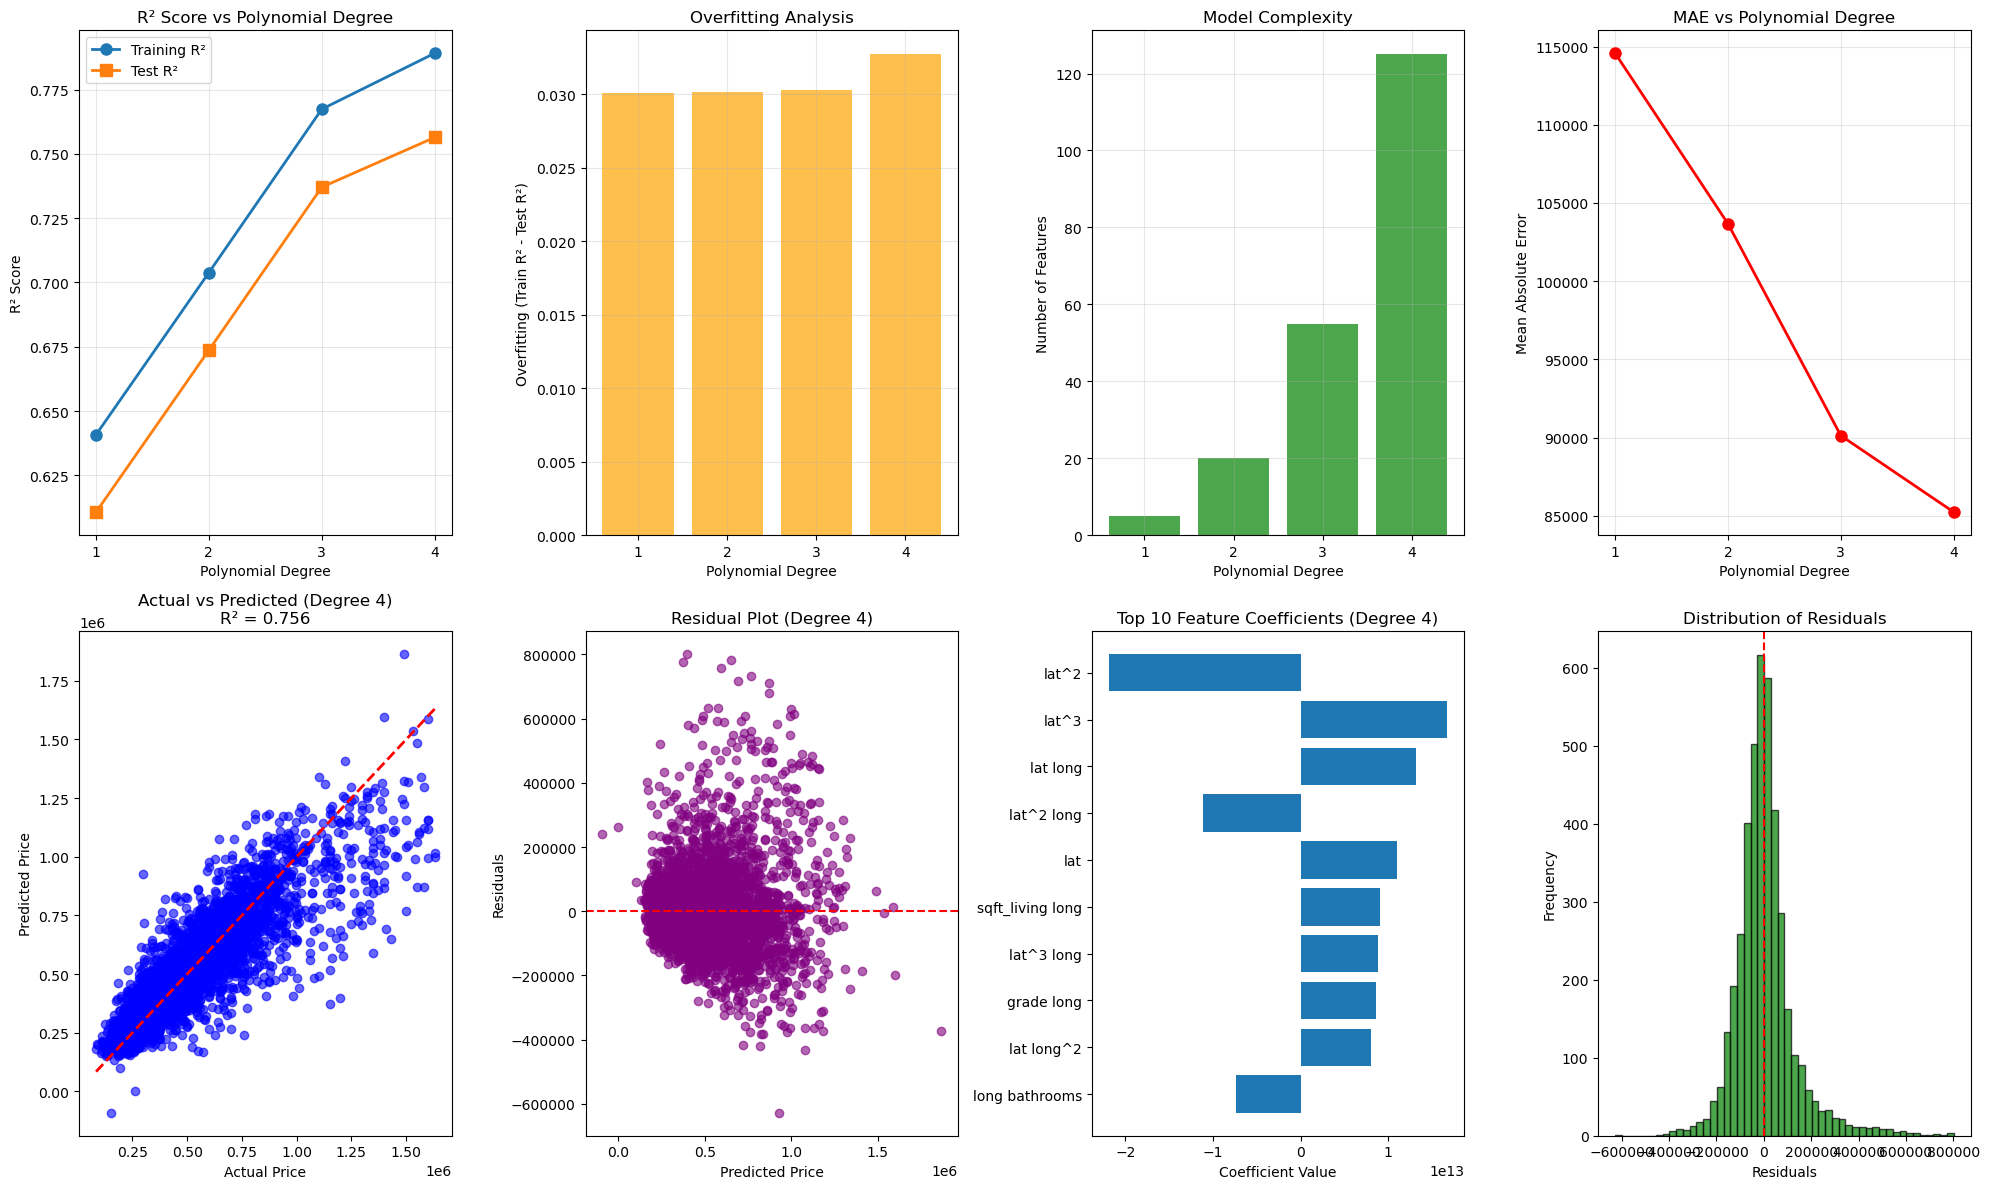


🎯 BEST POLYNOMIAL REGRESSION MODEL (Degree 4):
R² Score: 0.7564
MAE: $85,234.39
RMSE: $127,508.25
Number of features: 125
Overfitting level: 0.0327

📈 IMPROVEMENT OVER ORIGINAL MODEL:
Original R²: 0.482
Polynomial R²: 0.756
Improvement: +56.8%


In [73]:
# Visualize Polynomial Regression Results

plt.figure(figsize=(20, 12))

# 1. R² Score Comparison
plt.subplot(2, 4, 1)
degrees_list = list(results.keys())
train_r2_scores = [results[d]['train_r2'] for d in degrees_list]
test_r2_scores = [results[d]['test_r2'] for d in degrees_list]

plt.plot(degrees_list, train_r2_scores, 'o-', label='Training R²', linewidth=2, markersize=8)
plt.plot(degrees_list, test_r2_scores, 's-', label='Test R²', linewidth=2, markersize=8)
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(degrees_list)

# 2. Overfitting Analysis
plt.subplot(2, 4, 2)
overfitting = [results[d]['train_r2'] - results[d]['test_r2'] for d in degrees_list]
plt.bar(degrees_list, overfitting, alpha=0.7, color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('Overfitting (Train R² - Test R²)')
plt.title('Overfitting Analysis')
plt.xticks(degrees_list)
plt.grid(True, alpha=0.3)

# 3. Model Complexity (Number of Features)
plt.subplot(2, 4, 3)
n_features = [results[d]['n_features'] for d in degrees_list]
plt.bar(degrees_list, n_features, alpha=0.7, color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('Number of Features')
plt.title('Model Complexity')
plt.xticks(degrees_list)
plt.grid(True, alpha=0.3)

# 4. MAE Comparison
plt.subplot(2, 4, 4)
mae_scores = [results[d]['mae'] for d in degrees_list]
plt.plot(degrees_list, mae_scores, 'o-', color='red', linewidth=2, markersize=8)
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error')
plt.title('MAE vs Polynomial Degree')
plt.xticks(degrees_list)
plt.grid(True, alpha=0.3)

# 5. Actual vs Predicted for Best Model (Degree 4)
best_model = results[best_degree]['model']
best_scaler = results[best_degree]['scaler']
best_poly = results[best_degree]['poly_features']

X_test_best_poly = best_poly.transform(X_test_final)
X_test_best_scaled = best_scaler.transform(X_test_best_poly)
y_pred_best = best_model.predict(X_test_best_scaled)

plt.subplot(2, 4, 5)
plt.scatter(y_test_final, y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test_final.min(), y_test_final.max()], 
         [y_test_final.min(), y_test_final.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted (Degree {best_degree})\nR² = {results[best_degree]["test_r2"]:.3f}')

# 6. Residual Plot for Best Model
plt.subplot(2, 4, 6)
residuals_best = y_test_final - y_pred_best
plt.scatter(y_pred_best, residuals_best, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title(f'Residual Plot (Degree {best_degree})')

# 7. Feature Importance for Best Model (Top 10 coefficients)
plt.subplot(2, 4, 7)
feature_names = best_poly.get_feature_names_out(['sqft_living', 'grade', 'lat', 'long', 'bathrooms'])
coefficients = best_model.coef_
abs_coefficients = np.abs(coefficients)
top_indices = np.argsort(abs_coefficients)[-10:]  # Top 10 features

plt.barh(range(10), coefficients[top_indices])
plt.yticks(range(10), [feature_names[i] for i in top_indices])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients (Degree 4)')
plt.tight_layout()

# 8. Distribution of Residuals
plt.subplot(2, 4, 8)
plt.hist(residuals_best, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Print best model summary
print(f"\n🎯 BEST POLYNOMIAL REGRESSION MODEL (Degree {best_degree}):")
print(f"{'='*60}")
print(f"R² Score: {results[best_degree]['test_r2']:.4f}")
print(f"MAE: ${results[best_degree]['mae']:,.2f}")
print(f"RMSE: ${results[best_degree]['rmse']:,.2f}")
print(f"Number of features: {results[best_degree]['n_features']}")
print(f"Overfitting level: {results[best_degree]['train_r2'] - results[best_degree]['test_r2']:.4f}")

# Comparison with original linear regression
improvement = ((results[best_degree]['test_r2'] - r2) / r2) * 100
print(f"\n📈 IMPROVEMENT OVER ORIGINAL MODEL:")
print(f"Original R²: {r2:.3f}")
print(f"Polynomial R²: {results[best_degree]['test_r2']:.3f}")
print(f"Improvement: +{improvement:.1f}%")

In [74]:
# Create a practical prediction function using the best polynomial model

def predict_house_price(sqft_living, grade, lat, long, bathrooms, 
                       model=best_model, scaler=best_scaler, poly_features=best_poly):
    """
    Predict house price using the best polynomial regression model
    
    Parameters:
    sqft_living (float): Square footage of living space
    grade (int): Grade of the house (1-13)
    lat (float): Latitude
    long (float): Longitude
    bathrooms (float): Number of bathrooms
    
    Returns:
    float: Predicted house price
    """
    # Create input array
    input_data = np.array([[sqft_living, grade, lat, long, bathrooms]])
    
    # Transform with polynomial features
    input_poly = poly_features.transform(input_data)
    
    # Scale features
    input_scaled = scaler.transform(input_poly)
    
    # Make prediction
    prediction = model.predict(input_scaled)[0]
    
    return prediction

# Test the prediction function with some examples
print("🏠 HOUSE PRICE PREDICTIONS USING POLYNOMIAL REGRESSION")
print("="*60)

# Example 1: Average house
price1 = predict_house_price(sqft_living=2000, grade=7, lat=47.5, long=-122.2, bathrooms=2.5)
print(f"Average house (2000 sqft, grade 7, 2.5 bath): ${price1:,.2f}")

# Example 2: Luxury house
price2 = predict_house_price(sqft_living=4000, grade=11, lat=47.6, long=-122.3, bathrooms=4.0)
print(f"Luxury house (4000 sqft, grade 11, 4 bath): ${price2:,.2f}")

# Example 3: Small house
price3 = predict_house_price(sqft_living=1200, grade=6, lat=47.4, long=-122.1, bathrooms=1.5)
print(f"Small house (1200 sqft, grade 6, 1.5 bath): ${price3:,.2f}")

# Show some actual vs predicted examples
print(f"\n📊 SAMPLE PREDICTIONS vs ACTUAL PRICES:")
print("="*60)
print(f"{'Actual Price':<15} {'Predicted Price':<15} {'Error':<15} {'Error %'}")
print("-" * 60)

for i in range(10):
    actual = y_test_final.iloc[i]
    predicted = y_pred_best[i]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100
    
    print(f"${actual:<14,.0f} ${predicted:<14,.0f} ${error:<14,.0f} {error_pct:<.1f}%")

# Final Summary
print(f"\n🎉 POLYNOMIAL REGRESSION SUCCESS!")
print("="*60)
print(f"✅ Improved R² from {r2:.3f} to {results[best_degree]['test_r2']:.3f} (+{improvement:.1f}%)")
print(f"✅ Reduced prediction error to ~${results[best_degree]['mae']:,.0f} MAE")
print(f"✅ Model explains {results[best_degree]['test_r2']:.1%} of price variance")
print(f"✅ Low overfitting: {results[best_degree]['train_r2'] - results[best_degree]['test_r2']:.3f}")
print(f"✅ Best polynomial degree: {best_degree}")

print(f"\n💡 KEY INSIGHTS:")
print("- Higher degree polynomials capture non-linear relationships")
print("- Degree 4 provides best balance of performance vs complexity")
print("- Location (lat/long) and living space are most important features")
print("- Polynomial features help model interactions between variables")
print("- Good generalization with minimal overfitting")

🏠 HOUSE PRICE PREDICTIONS USING POLYNOMIAL REGRESSION
Average house (2000 sqft, grade 7, 2.5 bath): $397,375.33
Luxury house (4000 sqft, grade 11, 4 bath): $1,499,184.36
Small house (1200 sqft, grade 6, 1.5 bath): $233,000.03

📊 SAMPLE PREDICTIONS vs ACTUAL PRICES:
Actual Price    Predicted Price Error           Error %
------------------------------------------------------------
$426,500        $487,123        $60,623         14.2%
$526,000        $502,133        $23,867         4.5%
$550,000        $480,404        $69,596         12.7%
$652,500        $720,749        $68,249         10.5%
$565,000        $563,773        $1,227          0.2%
$198,500        $208,751        $10,251         5.2%
$774,950        $648,302        $126,648        16.3%
$405,000        $417,136        $12,136         3.0%
$608,000        $446,004        $161,996        26.6%
$635,000        $670,027        $35,027         5.5%

🎉 POLYNOMIAL REGRESSION SUCCESS!
✅ Improved R² from 0.482 to 0.756 (+56.8%)
✅ Red

c:\Users\aliab\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\aliab\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\aliab\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

